<a href="https://colab.research.google.com/github/gamesMum/Leukemia-Diagnostics/blob/master/Leukemia%20Diagnosis_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/blood-smear-images-for-aml-diagnosis/annotations.dat
/kaggle/input/blood-smear-images-for-aml-diagnosis/Abbreviations .txt
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYA/LYA_0011.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYA/LYA_0007.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYA/LYA_0002.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYA/LYA_0010.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYA/LYA_0001.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYA/LYA_0009.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYA/LYA_0005.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cyt

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_2261.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_4144.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_4873.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_4500.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_1372.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_8067.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_1441.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_8179.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_0288.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_0226.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_3110.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_7943.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_4437.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_5066.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_4756.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_3657.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_5285.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_8402.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_7163.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_2741.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_0052.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_5436.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_1917.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_1350.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_3048.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_0166.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_2462.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_3584.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_5814.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_8175.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_6197.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/NGS/NGS_3263.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MON/MON_1628.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MON/MON_0710.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MON/MON_1769.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MON/MON_1017.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MON/MON_1442.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MON/MON_0061.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MON/MON_0200.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MON/MON_1198.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_2697.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_1447.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_2811.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_0468.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_0357.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_2268.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_2089.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_0142.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_0087.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_2277.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_0461.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_2837.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_0783.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_2997.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_3030.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/MYO/MYO_1299.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_3802.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_0430.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_3608.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_1618.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_1288.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_0282.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_1085.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_2450.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_1510.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_1229.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_2713.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_2672.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_0656.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_1749.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_2002.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU/LYT/LYT_0995.tiff
/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cy

In [0]:
#inporting the necessary libraries
import torch
from torch import nn
from torchvision import transforms, datasets, models

In [0]:
#list all the models in torchvision
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [0]:
#check if CUDA is available
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
    print("CUDA is available. Training on GPU!")
else:
    print("CUDA is not available. Training on CPU.")

CUDA is available. Training on GPU!


In [0]:
#time to prepare the data
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision as tv

batch_size = 32
test_size = 0.2
valid_size = 0.2

mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

#define the transforms
train_transform  = transforms.Compose([transforms.Resize((400,400)),
                                       transforms.RandomRotation(359),
                                       transforms.RandomHorizontalFlip(0.2),
                                       transforms.RandomVerticalFlip(0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])

test_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=mean, std=std)])

train_data = datasets.ImageFolder("/kaggle/input/blood-smear-images-for-aml-diagnosis/AML-Cytomorphology_LMU/AML-Cytomorphology_LMU",
                                  transform = train_transform)

#obtain training indicies that will be used as testing and validation

num_train = len(train_data)
indicies = list(range(num_train))
np.random.shuffle(indicies)
split = int(np.floor(valid_size+test_size * num_train))
train_idx, test_idx, valid_idx = indicies[split:], indicies[:int(split/2)], indicies[int(split/2):split]
#define samplers for obtainig the trainig, testing and validation set
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           sampler = train_sampler)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          sampler = test_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          sampler = valid_sampler)



classes = ['BAS', 'EBO', 'EOS', 'KSC', 'LYA', 'LYT', 'MMZ', 'MOB', 'MON', 'MYB', 'MYO',
           'NGB', 'NGS', 'PMB', 'PMO']




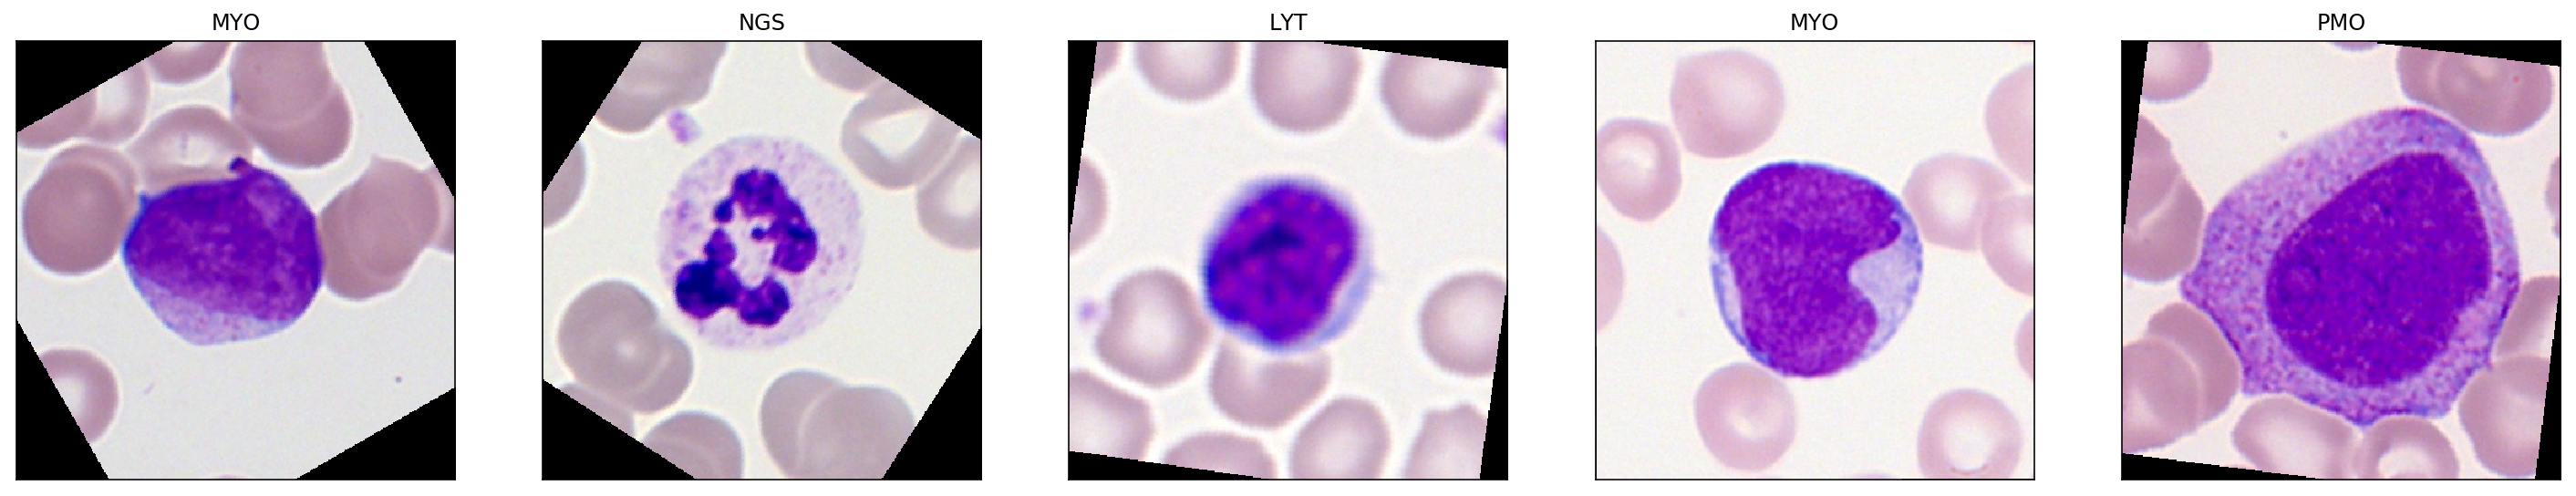

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


def imshow(img):
  img = img /2+0.5 #unormalize the images
  plt.imshow(np.transpose(img, (1, 2, 0))) #convert it back from tensor to image

#get one batch of training images
dataiter = iter(train_loader) #now contains the first batch
images, labels = dataiter.next() #images=the first batch of images, labels= the first batch of labels
images = images.numpy() #convert the images to display them

#plot the imahes in the batch along with the corresponding labels
fig = plt.figure(figsize=(25,6))

for idx in np.arange(5):
  ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[]) #(rows, cols, index, .., ..)
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])

In [0]:
#Load AlexNet pretrained model
model = models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [0]:
#freeze the model calssifier
for param in model.parameters():
  param.requires_grad = False

from collections import OrderedDict

classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(9216, 4608)),
                          ('relu', nn.ReLU()),
                          ('dropout', nn.Dropout(0.25)),
                          ('fc2', nn.Linear(4608, 1024)),
                          ('relu', nn.ReLU()),
                          ('dropout', nn.Dropout(0.25)),
                          ('fc3', nn.Linear(1024, 512)),
                          ('relu', nn.ReLU()),
                          ('dropout', nn.Dropout(0.25)),
                          ('fc4', nn.Linear(512, 15)),
                          ('output', nn.LogSoftmax(dim=1) )                                       
                                      ]))

model.classifier = classifier

In [0]:
from torch import optim
#Loss function and optmixation function
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)
if train_on_gpu:
    model.cuda()

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4608, bias=True)
    (relu): ReLU()
    (dropout): Drop

In [0]:
# number of epochs to train the model
import numpy as np
n_epochs = 50

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for images, labels in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the batch loss (comapre the values of the output model to the actual labels)
        loss = criterion(output, labels)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*images.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for images, labels in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the batch loss
        loss = criterion(output, labels)
        # update average validation loss 
        valid_loss += loss.item()*images.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)

        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_AML_classifier.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.214983 	Validation Loss: 0.877462
Validation loss decreased (inf --> 0.877462).  Saving model ...
Epoch: 2 	Training Loss: 0.651122 	Validation Loss: 0.628404
Validation loss decreased (0.877462 --> 0.628404).  Saving model ...
Epoch: 3 	Training Loss: 0.513339 	Validation Loss: 0.532512
Validation loss decreased (0.628404 --> 0.532512).  Saving model ...
Epoch: 4 	Training Loss: 0.466710 	Validation Loss: 0.499016
Validation loss decreased (0.532512 --> 0.499016).  Saving model ...
Epoch: 5 	Training Loss: 0.436985 	Validation Loss: 0.469864
Validation loss decreased (0.499016 --> 0.469864).  Saving model ...
Epoch: 6 	Training Loss: 0.417988 	Validation Loss: 0.454509
Validation loss decreased (0.469864 --> 0.454509).  Saving model ...
Epoch: 7 	Training Loss: 0.405497 	Validation Loss: 0.459314
Epoch: 8 	Training Loss: 0.396615 	Validation Loss: 0.436185
Validation loss decreased (0.454509 --> 0.436185).  Saving model ...
Epoch: 9 	Training Loss: 0.381165 

In [0]:
model.load_state_dict(torch.load('model_AML_classifier.pt'))


<All keys matched successfully>

In [0]:
#initialize the test loss
test_loss = 0.0

class_correct = list(0. for i in range(15))
class_total = list (0. for i in range(15))

#set the model to test and validation mode (no gradient descent needed)
model.eval()

for data, target in test_loader:
  #move the tensor to GPU ig available
  if train_on_gpu:
    data, target = data.cuda(), target.cuda()
  #forward pass: compute prediction output by passing the first batch of test data
  output = model(data)
  #calculate the batch size
  loss = criterion(output, target)
  #update the test loss
  test_loss += loss.item()*data.size(0)
  #convert output probabilities to output class
  _, pred = torch.max(output, 1)
  #compare the prediction to true label
  correct_tensor = pred.eq(target.data.view_as(pred))
  #conveert to numpy array and remove the extra dimention and get only the result
  correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())

  #calculate test accuracy for each object class
  for i in range(batch_size):
    try:
      label = target.data[i] #get the corresponding label from the object
      class_correct[label] += correct[i].item()
      class_total[label] += 1
    except IndexError:
      break
  
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(15):
  if class_total[i] > 0:
     print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
       print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))
   



Test Loss: 0.023597

Test Accuracy of   BAS:  0% ( 0/12)
Test Accuracy of   EBO:  0% ( 0/ 3)
Test Accuracy of   EOS: 81% (27/33)
Test Accuracy of   KSC: N/A (no training examples)
Test Accuracy of   LYA:  0% ( 0/ 2)
Test Accuracy of   LYT: 96% (383/397)
Test Accuracy of   MMZ:  0% ( 0/ 1)
Test Accuracy of   MOB:  0% ( 0/ 1)
Test Accuracy of   MON: 86% (154/179)
Test Accuracy of   MYB:  0% ( 0/ 6)
Test Accuracy of   MYO: 94% (297/313)
Test Accuracy of   NGB:  0% ( 0/12)
Test Accuracy of   NGS: 99% (868/872)
Test Accuracy of   PMB: N/A (no training examples)
Test Accuracy of   PMO: 40% ( 2/ 5)

Test Accuracy (Overall): 94% (1731/1836)


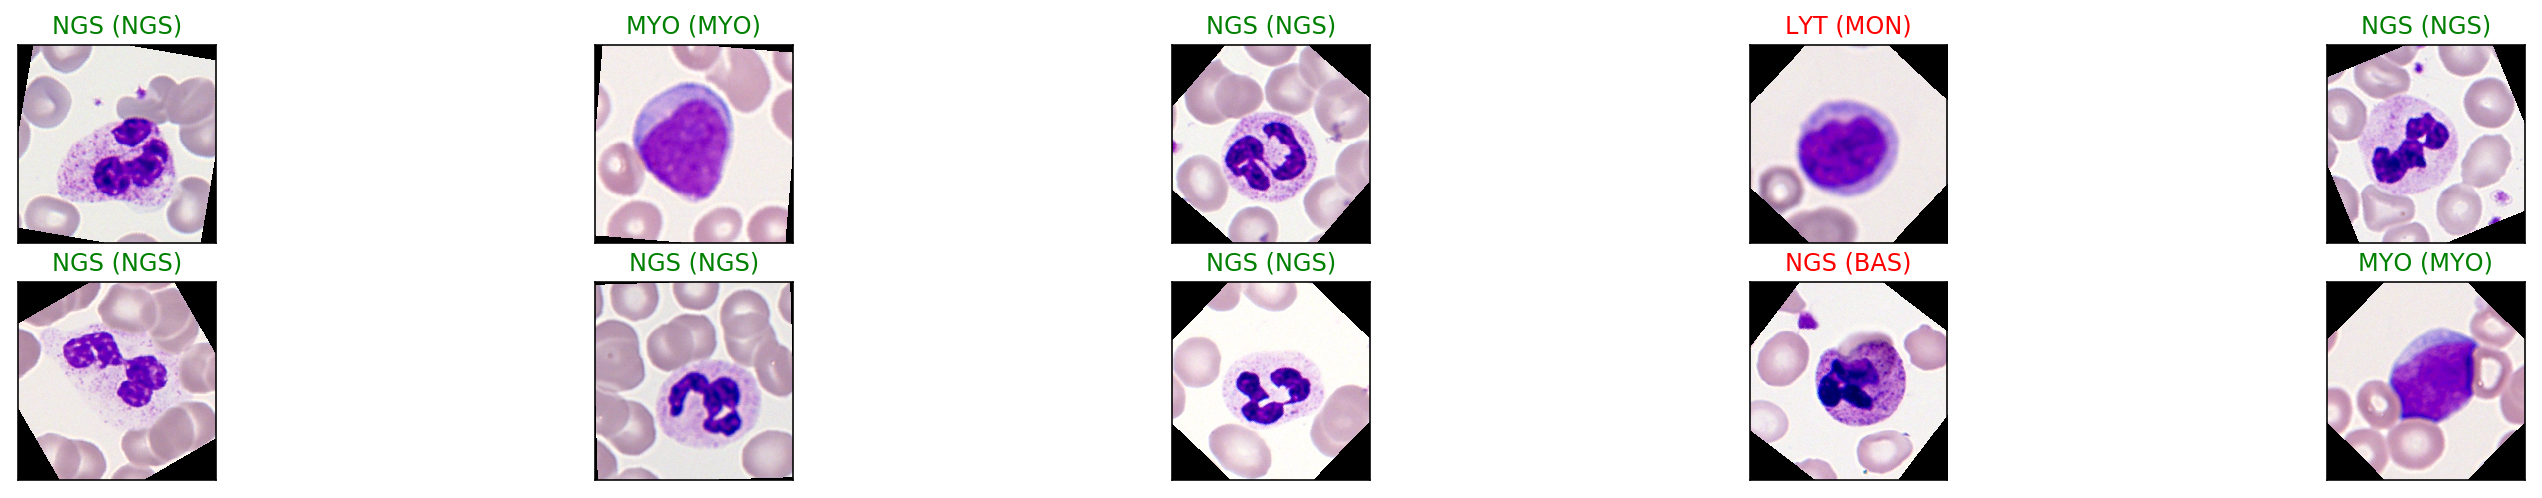

In [0]:
#Visualizing a sample tested of data
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

#Move model inputs to cuda
if train_on_gpu:
    images = images.cuda()

#get sample outputs
output = model(images)
#convert probabilties to prediction class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))